In [1]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from pathlib import Path
from matplotlib import cm
from matplotlib.colors import Normalize


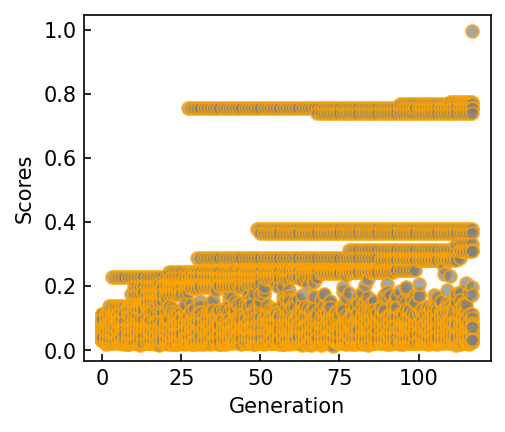

In [2]:
# Fig 2b---- Scores vs generation

scores = np.loadtxt('Data/scores_2b.dat')
gen_no = np.loadtxt('Data/gen_2b.dat')

n_pop=100
#print(scores.shape, gen_no.shape)

fig2b, ax2 = plt.subplots(figsize=(3.5, 3), dpi=150, facecolor='white')
cmap = cm.viridis_r

# Scatter plot with colormap based on rank
for i in range(gen_no.shape[0]):
    ranks = np.argsort(np.argsort(scores[i, :]))
    norm = Normalize(vmin=ranks.min(), vmax=ranks.max())
    colors_score = cmap(norm(ranks))

    ax2.scatter([gen_no[i]] * n_pop, scores[i], alpha=0.7, edgecolor='orange', color='grey', s=38)

ax2.set_xlabel('Generation')
ax2.set_ylabel('Scores')
ax2.tick_params(direction='in')
#plt.savefig('Fig2b.pdf', bbox_inches='tight')

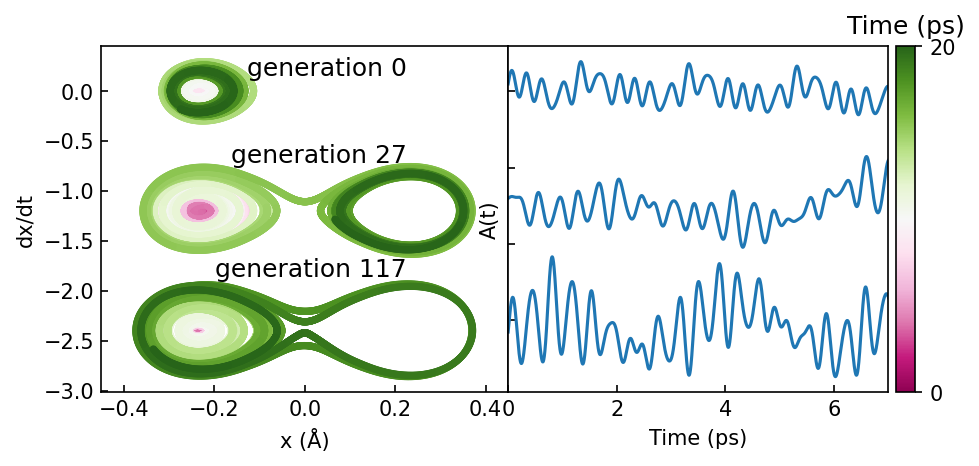

In [3]:
# Fig 2cd---- Phase space + Protocols
from mpl_toolkits.axes_grid1 import make_axes_locatable

sol_x_all = np.loadtxt('Data/sol_x_2c.dat')
sol_v_all = np.loadtxt('Data/sol_v_2c.dat')
At_all = np.loadtxt('Data/protocol_2d.dat')

freq_in_thz = 6.3507799295888985 # converts w=sqrt(k/m) in sqrt(THz/(Angstrom^2 * atomic mass unit)) to THz
t_in_ps = 1 / freq_in_thz

tspan = [0, 20/t_in_ps]
tfine = np.linspace(*tspan, 20000)
norm2 = Normalize(vmin=np.min(tfine*t_in_ps), vmax=np.max(tfine*t_in_ps))

fig2cd, (ax3,ax4) = plt.subplots(1,2,figsize=(7, 3), dpi=150, facecolor='white')

for idx in range(len(sol_x_all)-1,-1,-1):
    sc=ax3.scatter(sol_x_all[idx], sol_v_all[idx]-1.2*idx, c = tfine*t_in_ps, cmap='PiYG', edgecolor='none', norm=norm2, s=12)
    ax4.plot(tfine*t_in_ps, At_all[idx]-(15*idx), color='C0', label=f'gen {idx+1}')

ax3.set_xlabel('x (Å)')
ax3.set_ylabel('dx/dt')
ax3.tick_params(direction='in')
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.set_position([0.8, 0.2, 0.03, 0.6])
cbar = fig2cd.colorbar(sc, cax=cax,orientation='vertical')
cbar.ax.set_title('Time (ps)')
cbar.set_ticks([norm2.vmin, norm2.vmax])
cbar.ax.set_yticklabels(['0', '20'])

ax4.set_xlabel('Time (ps)')
ax4.set_ylabel('A(t)', labelpad=0.5)
ax4.set_xlim(0,7)
ax4.tick_params(direction='in')

ax3.text(0.75, 0.97, "generation 0", transform=ax3.transAxes,fontsize=12, va='top', ha='right')
ax3.text(0.75, 0.72, "generation 27", transform=ax3.transAxes,fontsize=12, va='top', ha='right')
ax3.text(0.75, 0.39, "generation 117", transform=ax3.transAxes,fontsize=12, va='top', ha='right')
ax4.set_yticklabels([])

# Remove the last x-axis tick label for ax3
xticks = ax3.get_xticks()
xticklabels = [item.get_text() for item in ax3.get_xticklabels()]
# Remove the last tick label
if xticklabels:
    xticklabels[-1] = ''
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)
ax3.set_xlim(-0.45,0.45)

plt.subplots_adjust(wspace=0)
#plt.savefig('Fig2cd.pdf', bbox_inches='tight')